<a href="https://colab.research.google.com/github/shivanivadlamani/Play_store-App-Review-EDA-analysis/blob/main/playstore_analysis_personel_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT

# Playstore  app review analysis


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
play_store_data_path = '/content/drive/MyDrive/projectEDA/'


In [4]:
play_store_df = pd.read_csv('/content/drive/MyDrive/projectEDA/Play Store Data.csv')
user_reviews_df = pd.read_csv('/content/drive/MyDrive/projectEDA/User Reviews.csv')

In [5]:
print(f"The shape of PlayStore_df is {play_store_df.shape}")
print(f"The shape of UserReview_df is {user_reviews_df.shape}")

The shape of PlayStore_df is (10841, 13)
The shape of UserReview_df is (64295, 5)


In [6]:
print(play_store_df.columns)
print(user_reviews_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


# 1. Lets Explore play_store DataFrame

In [7]:
# Filling the space between the column names with "_" for ease of use in the play_store.

play_store_df.columns = play_store_df.columns.str.replace(" ","_")
play_store_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [8]:
play_store_df.shape

(10841, 13)

In [9]:
#viewing playstore dataframe
play_store_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [10]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
play_store_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# 2. Lets Explore user_review DataFrame

In [12]:
user_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [13]:
user_reviews_df.shape

(64295, 5)

In [14]:
user_reviews_df.head(-1)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [15]:
user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [16]:
user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [17]:
# Dataset Duplicate Value Count
#playstore dataset
duplicate_playstore_data = play_store_df.copy()
duplicated_ps_count = duplicate_playstore_data.duplicated().sum() 
duplicated_ps_count

483

In [18]:
# Dataset Duplicate Value Count
#user review dataset
duplicate_user_reviews = user_reviews_df.copy()
duplicated_ur_count = duplicate_user_reviews.duplicated().sum()
duplicated_ur_count

33616

In [19]:
# Missing Values/Null Values Count
#playstore
playstore_nullvalues = duplicate_playstore_data.isnull().sum()
print(playstore_nullvalues)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64


In [20]:
# Missing Values/Null Values Count
# User reviews
user_reviews_nullvalues = duplicate_user_reviews.isnull().sum()
print(user_reviews_nullvalues)

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


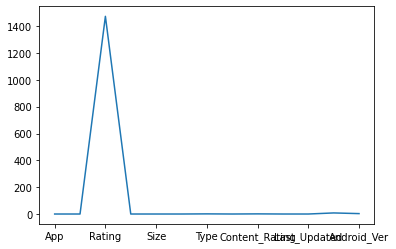

In [21]:
playstore_nullvalues.plot(kind = 'line')


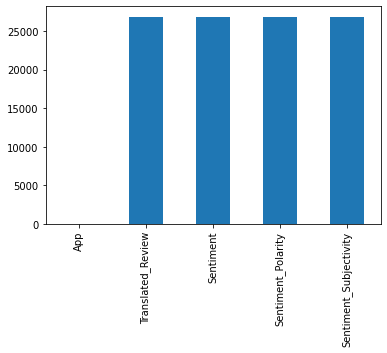

In [22]:
user_reviews_nullvalues.plot(kind = 'bar')


In [23]:
# Dataset Describe
# Playstore
duplicate_playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [24]:
# Check Unique Values for each variable.
# Playstore
playstore_uniquevalues = duplicate_playstore_data.nunique()
print(playstore_uniquevalues)

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content_Rating       6
Genres             120
Last_Updated      1378
Current_Ver       2832
Android_Ver         33
dtype: int64


In [25]:
# Check Unique Values for each variable.
# User review
user_review_uniquevalues = duplicate_user_reviews.nunique()
print(user_review_uniquevalues)

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64


In [26]:
def PlayStoreinfo():
    temp = pd.DataFrame(index=duplicate_playstore_data.columns)
    temp['data_type'] = duplicate_playstore_data.dtypes
    temp["count of non null values"] = duplicate_playstore_data.count()
    temp['NaN values'] = duplicate_playstore_data.isnull().sum()
    temp['% NaN values'] = duplicate_playstore_data.isnull().mean() *100
    temp['unique_count'] = duplicate_playstore_data.nunique()
    return temp 
PlayStoreinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,13.596532,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.009224,3
Price,object,10841,0,0.000000,93
Content_Rating,object,10840,1,0.009224,6
Genres,object,10841,0,0.000000,120


In [27]:
def PlayStoreinfo():
    temp = pd.DataFrame(index=duplicate_playstore_data.columns)
    temp['data_type'] = duplicate_playstore_data.dtypes
    temp["count of non null values"] = duplicate_playstore_data.count()
    temp['NaN values'] = duplicate_playstore_data.isnull().sum()
    temp['% NaN values'] = duplicate_playstore_data.isnull().mean() *100
    temp['unique_count'] = duplicate_playstore_data.nunique()
    return temp 
PlayStoreinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,13.596532,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.009224,3
Price,object,10841,0,0.000000,93
Content_Rating,object,10840,1,0.009224,6
Genres,object,10841,0,0.000000,120


In [28]:
# Finding the row with insufficiant data
duplicate_playstore_data[duplicate_playstore_data['Type']!='Free'][duplicate_playstore_data[duplicate_playstore_data['Type']!='Free']['Price']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [29]:
#Droping the row from the data frame
duplicate_playstore_data.drop(duplicate_playstore_data[duplicate_playstore_data['Type']!='Free'][duplicate_playstore_data[duplicate_playstore_data['Type']!='Free']['Price']=='0'].index, inplace=True)

In [30]:
# Finding the null values column
duplicate_playstore_data[duplicate_playstore_data['Current_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [31]:
# Removing/droping null values
duplicate_playstore_data = duplicate_playstore_data[duplicate_playstore_data['Current_Ver'].notna()]
duplicate_playstore_data.shape

(10832, 13)

In [32]:
# Finding rows of null values
duplicate_playstore_data[duplicate_playstore_data['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [33]:
duplicate_playstore_data = duplicate_playstore_data[duplicate_playstore_data['Android_Ver'].notna()]
duplicate_playstore_data.shape

(10829, 13)

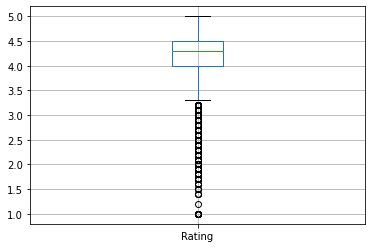

In [34]:
duplicate_playstore_data.boxplot()

In [35]:

duplicate_user_reviews = duplicate_user_reviews[~duplicate_user_reviews['Sentiment'].isna()]
# non_null_user_reviews_df.info()
duplicate_user_reviews.isna().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [36]:
duplicate_user_reviews = duplicate_user_reviews.dropna(subset = ['Translated_Review'],how='all')
# duplicate_user_reviews.isna().sum()
duplicate_user_reviews.shape

(37427, 5)

In [37]:
playstore_data_copy = duplicate_playstore_data.copy()
user_review_copy = duplicate_user_reviews.copy()

In [38]:
#Filtering duplicate apps
duplicate_column_check = playstore_data_copy['App'].duplicated().any()
duplicate_column_check

True

In [39]:
# defining a function to clean data
def data_clean(num):
    replacements = {'+': '', ',': '', '$': '', 'M': '000000', 'k': '000', 'NaN': '0'}
    for old, new in replacements.items():
        num = num.replace(old, new)
    return num

In [40]:
# Cleaning the unwanted charactors and converting the required column values into valid numeric type for easy analysis
playstore_data_copy['Reviews'] = pd.to_numeric(playstore_data_copy['Reviews'])
playstore_data_copy['Size'] = playstore_data_copy['Size'].apply(lambda x: 'NaN' if x == 'Varies with device' else x)
playstore_data_copy['Size'] = pd.to_numeric(playstore_data_copy['Size'].map(data_clean))
playstore_data_copy['Installs'] = pd.to_numeric(playstore_data_copy['Installs'].map(data_clean))
playstore_data_copy['Price'] = pd.to_numeric(playstore_data_copy['Price'].map(data_clean))

In [41]:
#selecting all the last rows of data for each app for max review analysis
playstore_last_rev = playstore_data_copy.groupby('App').tail(1).reset_index()

app_review_max = playstore_last_rev.loc[playstore_last_rev.groupby(['App'])['Reviews'].idxmax()]
app_review_max

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
7694,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7342,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
266,324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3356,4541,.R,TOOLS,4.5,259,203000.0,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3451,4636,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59000000.0,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
3179,4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
1772,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000.0,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6370,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [42]:
app_review_max.max()

index                                                        10840
App               🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Category                                                   WEATHER
Rating                                                         5.0
Reviews                                                   78128208
Size                                                   100000000.0
Installs                                                1000000000
Type                                                          Paid
Price                                                        400.0
Content_Rating                                             Unrated
Genres                                                        Word
Last_Updated                                     September 9, 2017
Current_Ver                                          version 0.994
Android_Ver                                     Varies with device
dtype: object

In [43]:
# Displaying Genres
top_genres = app_review_max.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
top_genres

,Genres,Count
0,Tools,826
1,Entertainment,560
2,Education,509
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [44]:
# displayin all free apps with max reviews
app_review_max[app_review_max['Price'] == 0]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
7694,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6,500,Free,0.0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7342,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000.0,1000000,Free,0.0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
266,324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1,10000,Free,0.0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3356,4541,.R,TOOLS,4.5,259,203000.0,10000,Free,0.0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3451,4636,/u/app,COMMUNICATION,4.7,573,53000000.0,10000,Free,0.0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,6420,감성학원 BL 첫사랑,COMICS,4.4,190,34000000.0,10000,Free,0.0,Everyone,Comics,"November 17, 2017",3.2.1,3.0 and up
5148,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59000000.0,100000,Free,0.0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
1772,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000.0,1000000,Free,0.0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6370,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2,10000,Free,0.0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [45]:
#Preparing dataframe which contains free app install counts
genres_free_apps_installs = app_review_max[app_review_max['Price'] == 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'free_app_installs'})
genres_free_apps_installs

,free_app_installs
Genres,
Action,3465986940
Action;Action & Adventure,53000000
Adventure,295417120
Adventure;Action & Adventure,106000000
Adventure;Education,10000000
...,...
Trivia;Education,100
Video Players & Editors,3916931720
Video Players & Editors;Music & Video,15000000


In [46]:
#Preparing dataframe which contains paid app install counts
genres_paid_apps_installs = playstore_data_copy[playstore_data_copy['Price']!= 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'Paid_app_installs'})
genres_paid_apps_installs

,Paid_app_installs
Genres,
Action,17052250
Action;Action & Adventure,20500
Adventure,1278200
Adventure;Action & Adventure,150000
Adventure;Brain Games,100000
...,...
Strategy;Action & Adventure,100000
Tools,1727431
Travel & Local,183060


In [47]:
#Preparing dataframe which contains mean Rating
genre_ratings = app_review_max.groupby(['Genres'])[['Rating']].mean()
genre_ratings

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,NaN
Video Players & Editors,4.043243
Video Players & Editors;Music & Video,4.000000


In [48]:
#Mergering all the data previous dataframes for further analysis
top_genres_installs = pd.merge(top_genres, genres_free_apps_installs, on='Genres')
top_genres_apps_installs = pd.merge(top_genres_installs, genres_paid_apps_installs, on='Genres')
top_genres_apps_installs_ratings= pd.merge(top_genres_apps_installs, genre_ratings, on='Genres')

#Getting top 50 app data based on the Genres
top_50_genres = top_genres_apps_installs_ratings.head(50)
top_50_genres

,Genres,Count,free_app_installs,Paid_app_installs,Rating
0,Tools,826,8090544474,1727431,4.039415
1,Entertainment,560,3014462513,242171,4.083439
2,Education,509,262803801,106247,4.290909
3,Business,419,691952090,412775,4.096565
4,Medical,396,38642344,1020033,4.169416
5,Productivity,374,5786679314,1412055,4.183389
6,Personalization,374,1529225988,5257794,4.331419
7,Lifestyle,368,492644429,1179110,4.093667
8,Finance,345,455163132,185602,4.115563
9,Sports,331,1411230683,1243815,4.223308


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

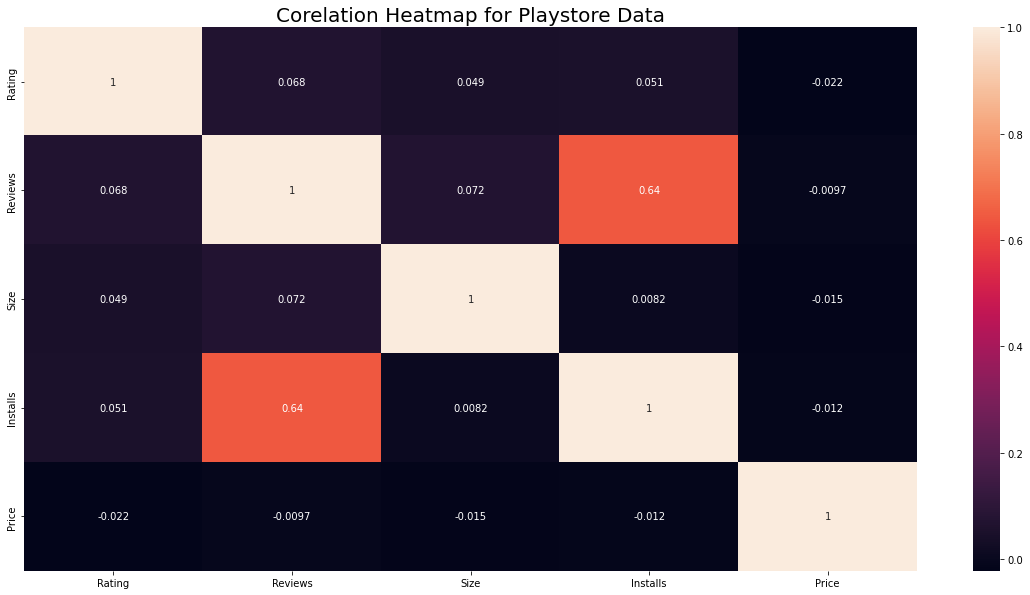

In [49]:
# Heat map for play_store
plt.figure(figsize = (20,10))
sns.heatmap(playstore_data_copy.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

Text(0.5, 0, 'Genres')

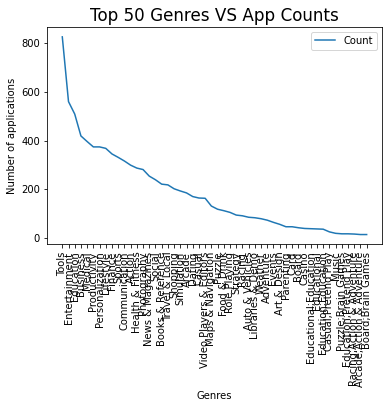

In [50]:
#Plotting Top 50 Genres VS App counts bar chart
top_50_genres[['Genres','Count']].set_index('Genres').plot(kind='line')
plt.xticks(range(len(top_50_genres['Genres'])), top_50_genres['Genres'], rotation=90)
plt.rc('font', size=14) 
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Top 50 Genres VS App Counts')
plt.ylabel('Number of applications')
plt.xlabel('Genres')

Text(0.5, 0, 'Genres')

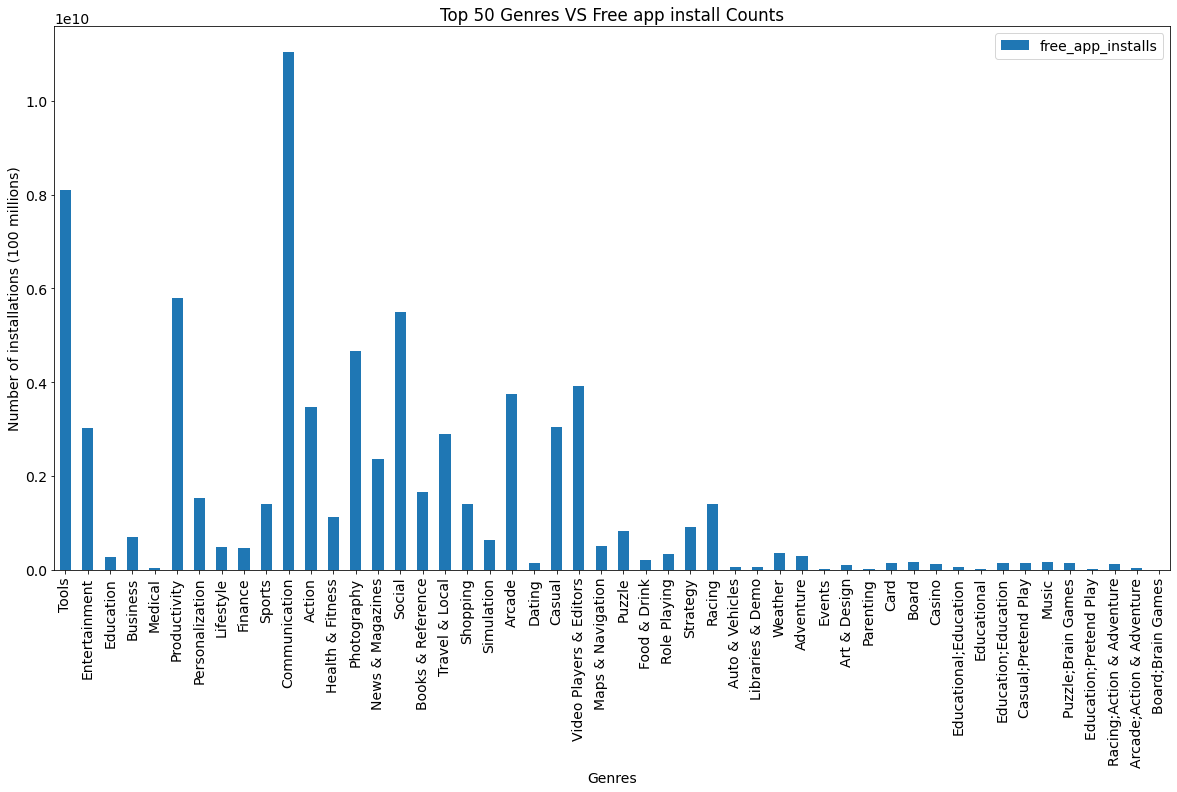

In [51]:
#Plotting Top 50 Genres VS Free apps install count chart
top_50_genres[['Genres','free_app_installs']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.title('Top 50 Genres VS Free app install Counts')
plt.ylabel('Number of installations (100 millions)')
plt.xlabel('Genres')

Text(0.5, 0, 'Genres')

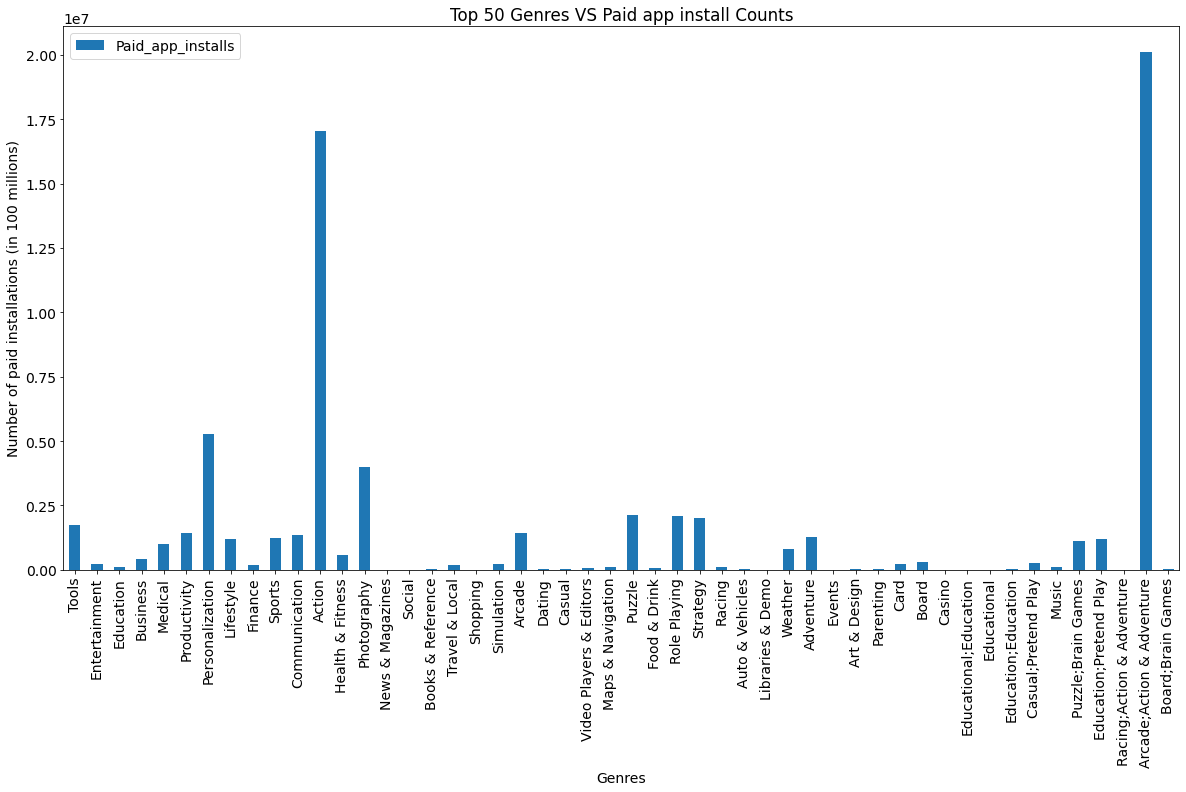

In [52]:
#Plotting Top 50 Genres VS Paid apps install count chart
top_50_genres[['Genres','Paid_app_installs']].set_index('Genres').plot(kind='bar')
plt.title('Top 50 Genres VS Paid app install Counts')
plt.ylabel('Number of paid installations (in 100 millions)')
plt.xlabel('Genres')

In [53]:
#Category wise free and paid app installs count
category_type_installs = playstore_data_copy.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
category_type_installs = category_type_installs[~category_type_installs['Installs']['Paid'].isna()].set_index('Category')
category_type_installs

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.243171e+08     16000.0
AUTO_AND_VEHICLES    5.308006e+07     50150.0
BOOKS_AND_REFERENCE  1.921445e+09     23316.0
BUSINESS             1.001502e+09    412775.0
COMMUNICATION        3.264592e+10   1360050.0
DATING               2.642895e+08     21350.0
EDUCATION            8.708500e+08    602000.0
ENTERTAINMENT        2.868960e+09    200000.0
EVENTS               1.597316e+07         1.0
FAMILY               1.022698e+10  31221814.0
FINANCE              8.764631e+08    185602.0
FOOD_AND_DRINK       2.738388e+08     60000.0
GAME                 3.506492e+10  21099965.0
HEALTH_AND_FITNESS   1.582498e+09    574110.0
LIBRARIES_AND_DEMO   6.199581e+07       100.0
LIFESTYLE            5.364644e+08   1179110.0
MAPS_AND_NAVIGATION  7.241608e+08    121100.0
MEDICAL              5.223740e+07   1020033.0
NEWS_AND_MAGAZINES   7.496312e+09      5500.0
PARENTING            3.147101e+07     50100.0
PERSONALIZATION      2.320226e+09   5257794.0
PHOTOGRAPHY          1.008427e+10   3978740.0
PRODUCTIVITY         1.417468e+10   1412055.0
SHOPPING             3.247839e+09     10100.0
SOCIAL               1.406986e+10      6000.0
SPORTS               1.749931e+09   1243815.0
TOOLS                1.145054e+10   1727431.0
TRAVEL_AND_LOCAL     6.868704e+09    183060.0
VIDEO_PLAYERS        6.221932e+09     71000.0
WEATHER              4.252885e+08    812000.0

Text(0.5, 1.0, 'App pricing trend across categories(in USD)')

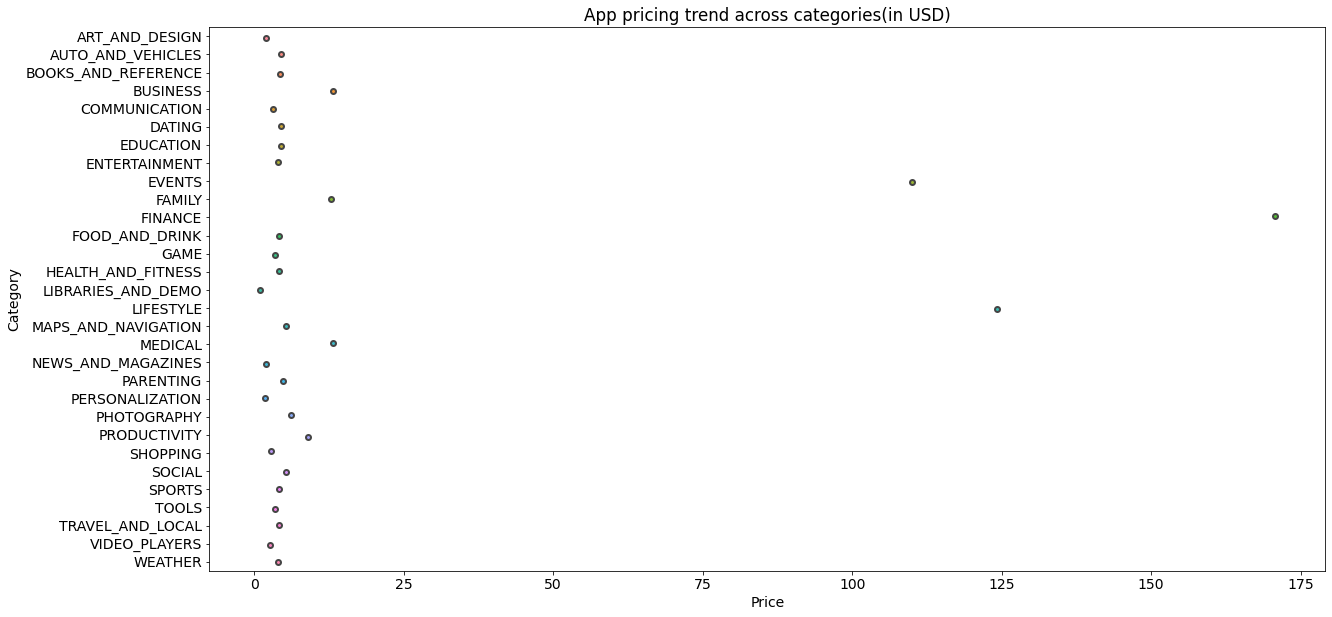

In [54]:
#App pricing across categories for Paid apps
categrory_price_mean = playstore_data_copy[playstore_data_copy['Price'] !=  0].groupby(['Category'])['Price'].mean().reset_index(name='Price')
ax = sns.stripplot(x='Price', y='Category', data=categrory_price_mean, jitter=True, linewidth=2)
ax.set_title('App pricing trend across categories(in USD)')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


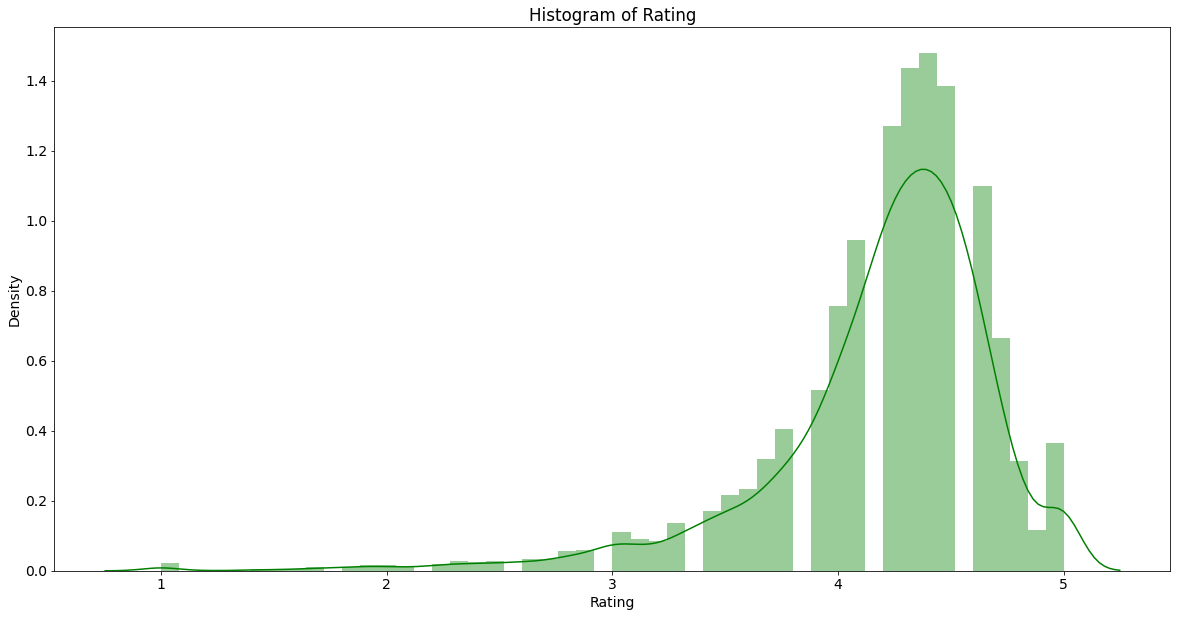

In [55]:
#Ploting the histogram Rating
rating_df = playstore_data_copy[~playstore_data_copy['Rating'].isna()]['Rating']

plt.title('Histogram of Rating')
sns.distplot(rating_df, hist=True , color = 'g')

Text(0.5, 1.0, 'Free app install Counts(in 100 millions)')

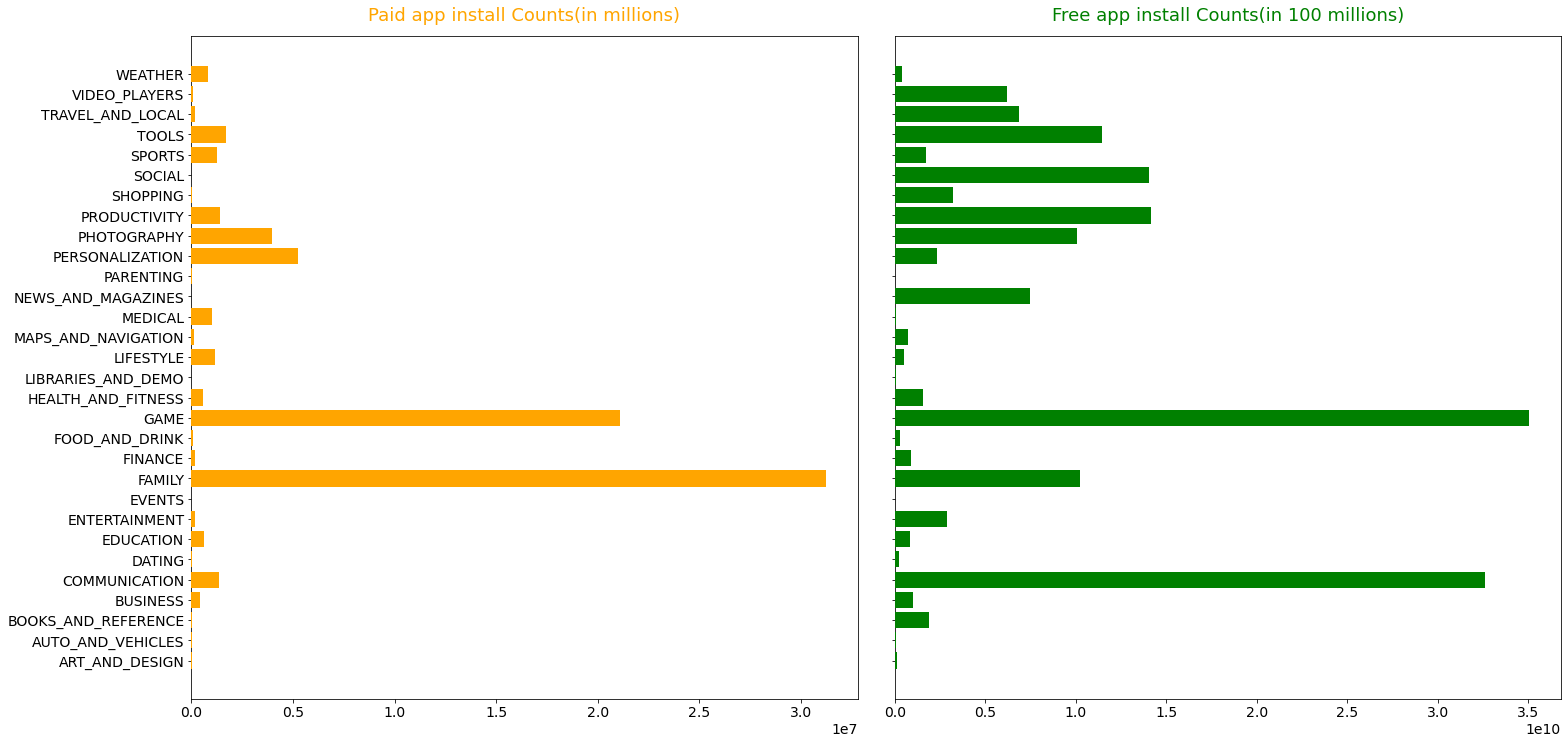

In [56]:
#Plot between Paid and Free installed app counts
ind = category_type_installs.index
column0 = category_type_installs['Installs']['Paid']
column1 = category_type_installs['Installs']['Free']
title0 = 'Paid app install Counts(in millions)'
title1 = 'Free app install Counts(in 100 millions)'

fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color='orange', zorder=12)
axes[0].set_title(title0, fontsize=18, pad=15, color='orange')
axes[1].barh(ind, column1, align='center', color='g', zorder=12)
axes[1].set_title(title1, fontsize=18, pad=15, color='g')

#plt.subplots_adjust(wspace=0.01, top=0.85, bottom=0.1, left=0.18, right=0.95)

Text(0.5, 0, 'Category')

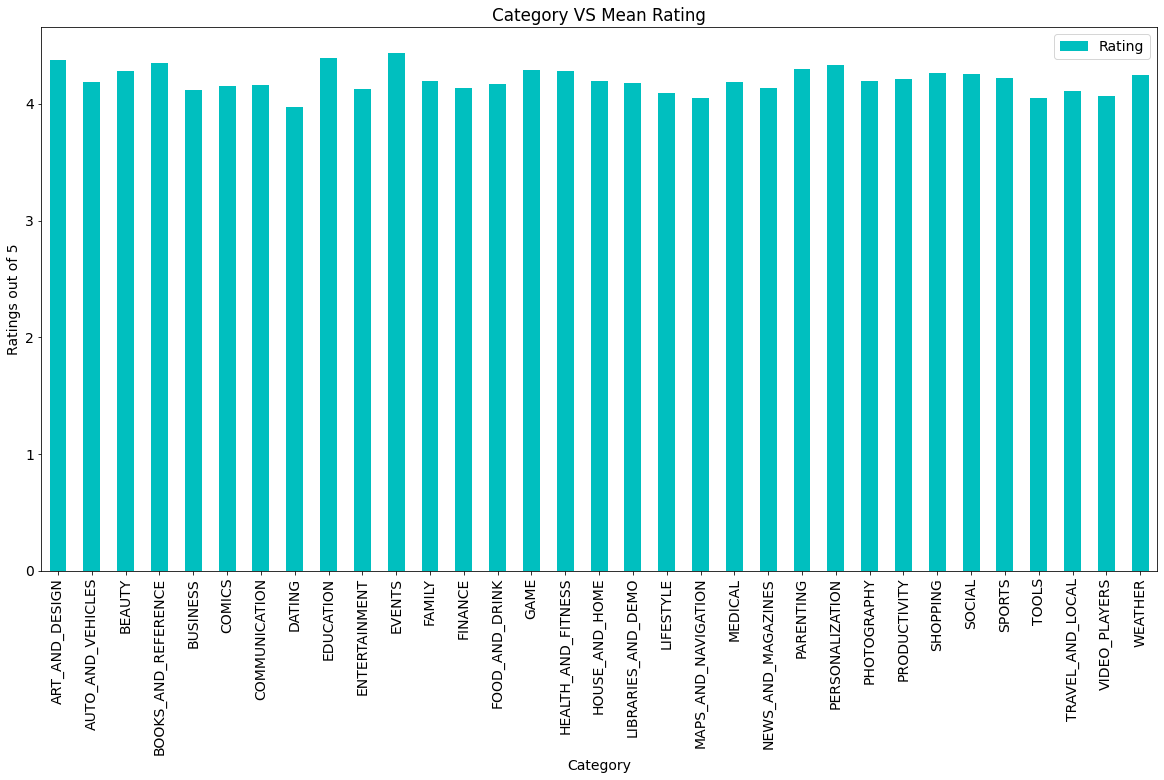

In [57]:
#ploting Catefgory wise mean Rating
category_mean_rating = playstore_data_copy.groupby(['Category'])['Rating'].mean().reset_index(name='Rating')
category_mean_rating.set_index('Category').plot(kind='bar' , color = 'c')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.title('Category VS Mean Rating')
plt.ylabel('Ratings out of 5')
plt.xlabel('Category')

In [58]:
#Ratings given by different age of people
content_rating = playstore_data_copy['Content_Rating'].value_counts()
content_rating

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

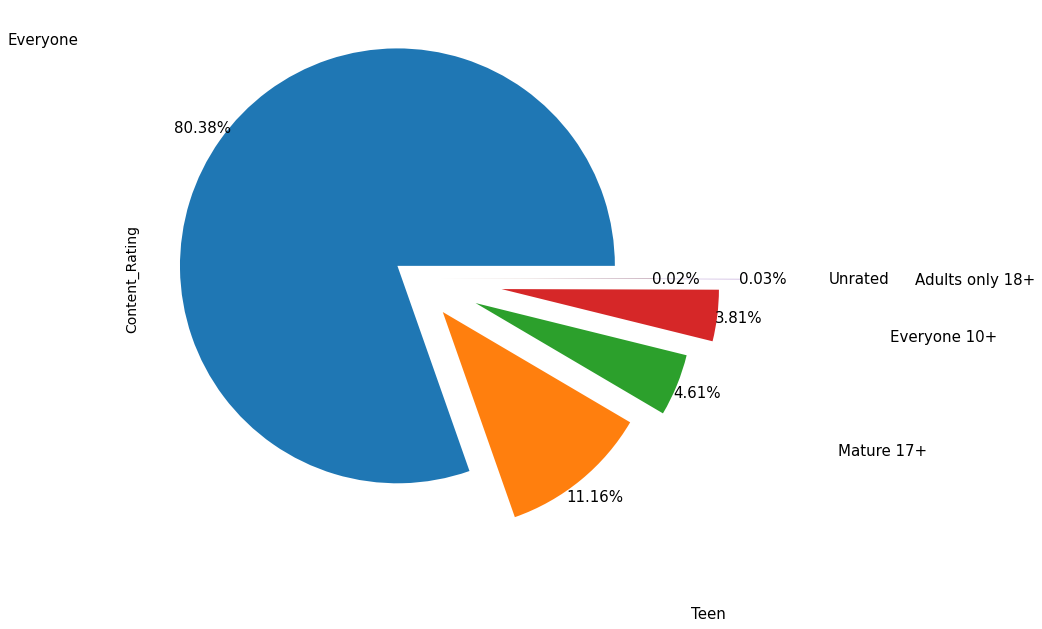

In [59]:
content_rating.plot(kind='pie', fontsize =15,explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%1.2f%%', pctdistance=1.1 , labeldistance= 1.8)
#Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [60]:
#Getting the top downloaded 10 apps and their Ratings vs Reviews
top_downloaded_apps = playstore_data_copy.groupby('App').tail(1).sort_values(['Installs','Rating'], ascending=False).head(50)
top_10_downloaded_apps = top_downloaded_apps.head(10).set_index('App')[['Rating','Reviews']].sort_values(['Reviews'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity')

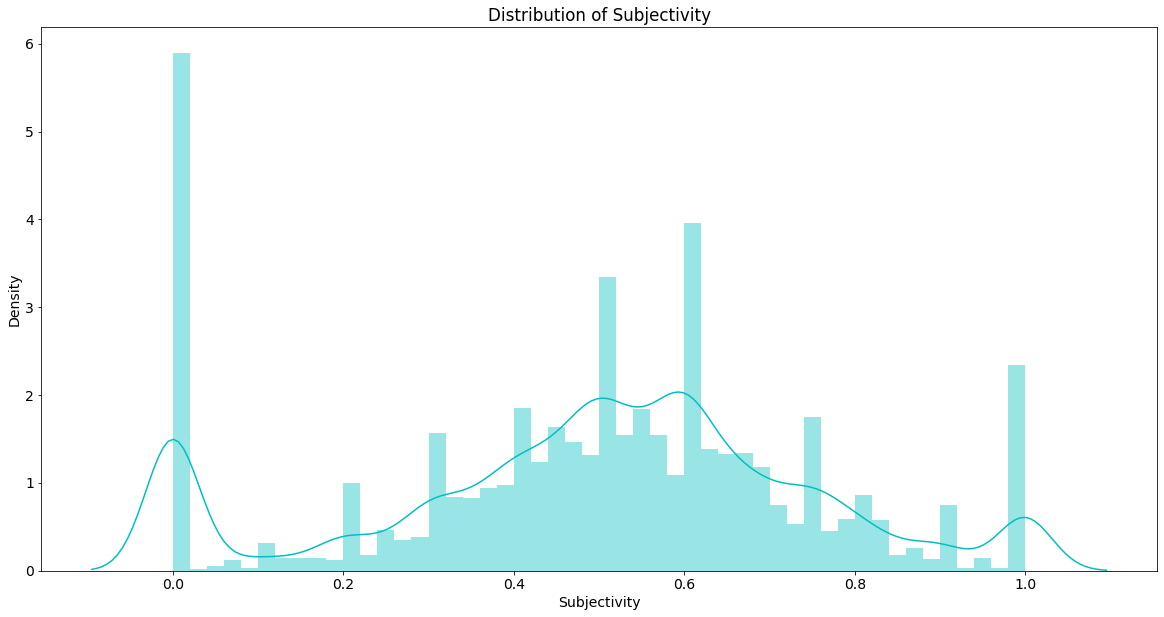

In [61]:
#Plotting the distribution of Subjectivity
sentiment_subjectivity_df = user_review_copy['Sentiment_Subjectivity']
sns.distplot(sentiment_subjectivity_df, hist=True , color ='c')
plt.xlabel("Subjectivity")
plt.title('Distribution of Subjectivity')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between sentiment_subjectivity and sentiment_polarity')

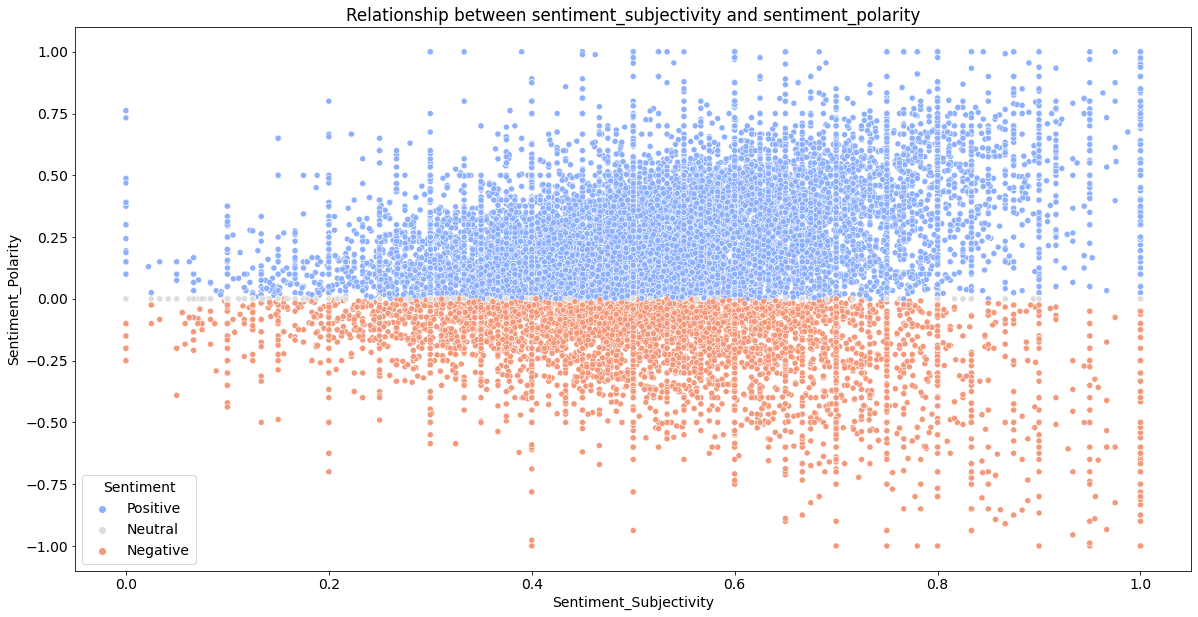

In [62]:
#Plotting the relationship between sentiment_subjectivity and sentiment_polarity in scatter plot
sns.scatterplot(user_review_copy['Sentiment_Subjectivity'], user_review_copy['Sentiment_Polarity'],hue =user_review_copy['Sentiment'], edgecolor='white', palette="coolwarm")
plt.title("Relationship between sentiment_subjectivity and sentiment_polarity")

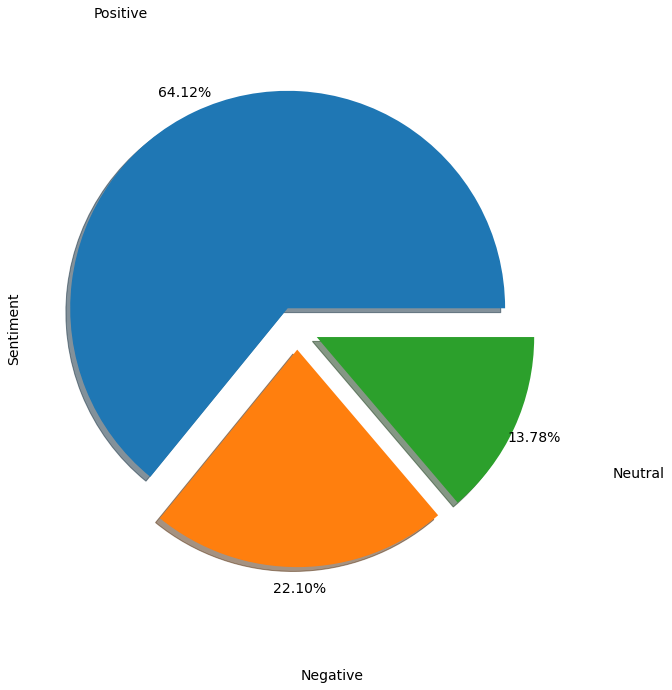

In [63]:
#Percentage of Review sentiments
user_review_copy['Sentiment'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1), shadow=True, autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.5)

In [64]:
#Counts of Review sentiments
user_review_copy['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64